In [4]:

%% Ignore below lines of code, Go to next section please

tbUseProject('calibration-module');
javaaddpath(which('mpa-jutil-0.0.1-SNAPSHOT.jar'));
javaaddpath(which('java-uuid-generator-3.1.4.jar'));

import ala_laurila_lab.*;
path = which('test-symphony-persistence.xml');
config = struct();
config.service.class = 'ala_laurila_lab.service.CalibrationService';
config.service.dataPersistence = 'test-rig-data';
config.service.logPersistence = 'test-rig-log';
config.service.persistenceXml = which('test-symphony-persistence.xml');
service = mdepin.createApplication(config, 'service');



Locating project "calibration-module" within "C:\Users\narayas2\Documents\MATLAB\projects".
  Found at "C:\Users\narayas2\Documents\MATLAB\projects\calibration-module".
Updating "ToolboxRegistry".
Already up-to-date.
Updating "calibration-module".
Host key verification failed. 
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
Updating "matlab-persistence".
Already up-to-date.
Found "jsonlab_v1.2" and skipping update.
Updating "logging4matlab".
Already up-to-date.
Updating "MatlabQuery".
Already up-to-date.
Updating "mdepin".
Already up-to-date.
Adding "ToolboxToolbox" to path at "C:\Users\narayas2\Documents\MATLAB\ToolboxToolbox".
Adding "calibration-module" to path at "C:\Users\narayas2\Documents\MATLAB\projects\calibration-module".
Adding "matlab-persistence" to path at "C:\Users\narayas2\Documents\MATLAB\toolboxes\matlab-persistence".
Adding "jsonlab_v1.2" to path at "C:\Users\narayas2\Documents\MATLAB\tool

In [5]:
%% Trying to calculate intensity to rstar
% From calibration api mode

LAMDA_MAX = 497;                        % Toda et al. 1999
ROD_PHOTORECEPTOR_AREA = 0.5 * 1e-12;   % um^2, collective area of rod (Murphy & Rieke (2011))

% get all the required instances, led names are weird but we can fix that in real calibration

intensity = service.getIntensityMeasurement('Blue');
spectrum = service.getSpectralMeasurement('blue', 'led');
linearity = service.getLinearityByStimulsDuration(5000, 'BlueLed');

% calculate rstar per second

powerPerUnitArea = intensity(end).getPowerPerUnitArea();
powerSpectrumPerArea = spectrum.getNormalizedPowerSpectrum() * powerPerUnitArea;
rstarPerSecond = util.photonToIsomerisation(powerSpectrumPerArea, spectrum.wavelength, LAMDA_MAX, ROD_PHOTORECEPTOR_AREA);

% get the transmitance value from ndf

ndf2 = service.getNDFMeasurement('A4B');
ndf3 = service.getNDFMeasurement('A1A');
trans = 10^(-(ndf2(end).opticalDensity + ndf3(end).opticalDensity));

% sample r-star table for ndf 5 

disp('ndf A1A + A4B');
disp('rstar       voltage')
disp('------------------------')

for voltage = [56.6532853243682, 90.9947797625159, 125.95670244329, 161.932053656434, 198.742115631752, 395.363673745042, 848.984144716212, 1372.9216466916]
    flux = linearity.getFluxByInput(voltage * 10^-3, 'factorized', true);
    rstar = flux * rstarPerSecond * trans;
    disp([num2str(rstar) '      ' num2str(voltage)]);
end

clear service;

ndf A1A + A4B
rstar       voltage
------------------------
1.5104      56.6533
2.4766      90.9948
3.4319      125.9567
4.3886      161.9321
5.3437      198.7421
10.1191      395.3637
19.6384      848.9841
29.0782      1372.9216




rstarPerSecond =

   1.0519e+05




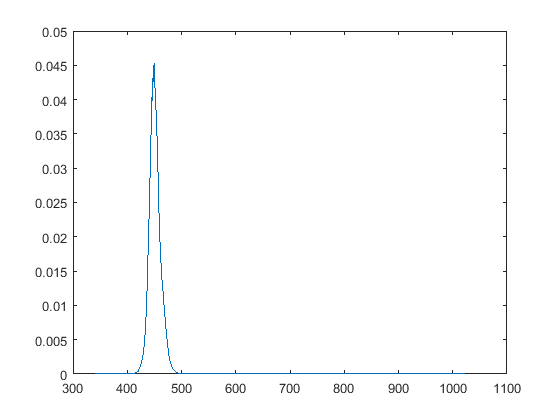

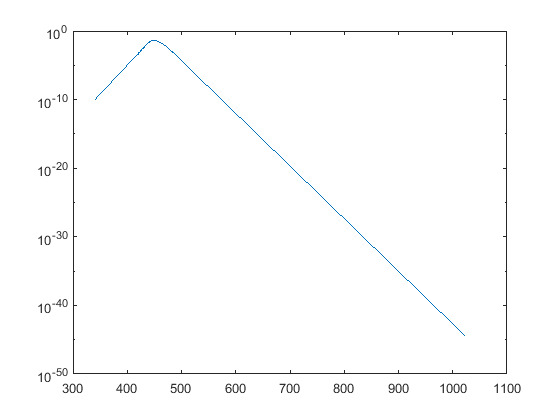

In [6]:
clear service;

%% simple calculation for projector

close all;

import ala_laurila_lab.*;

LAMDA_MAX = 497;                        % Toda et al. 1999
ROD_PHOTORECEPTOR_AREA = 0.5 * 1e-12;   % um^2, collective area of rod (Murphy & Rieke (2011))

spectrum = ala_laurila_lab.util.loadSpectralFile('src\test\resources\spectrum_aalto_rig', 'projector');
semilogy(spectrum.wavelength, spectrum.getNormalizedPowerSpectrum());
figure;
plot(spectrum.wavelength, spectrum.getNormalizedPowerSpectrum())
powerPerUnitArea = 0.15; % in watts for 1000 micron and led current of 100 and no ndf
powerSpectrumPerArea = spectrum.getNormalizedPowerSpectrum() * powerPerUnitArea;

rstarPerSecond = util.photonToIsomerisation(powerSpectrumPerArea, spectrum.wavelength, LAMDA_MAX, ROD_PHOTORECEPTOR_AREA)